<a href="https://colab.research.google.com/github/lucammarini/HPa/blob/develop/HPa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HPa** 
---
☣
**Simulador de partículas com features de:**
* Atração;
* Repulsão;
* Limites de parede;

## IMPORTS

In [66]:
#### IMPORT DE BIBLIOTECAS
from matplotlib import rc
rc('animation', html='jshtml')

In [67]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import pandas as pd

## FUNÇÕES

In [68]:
def frame(w):
    """Define a localização do frame atual e plota o gráfico"""
    ax.clear()
    global N,df
    
    df = position(N,df)

    x = df['x_i+1']
    y = df['y_i+1']
    carga = df['carga']
    carga_valor = df['carga_valor']

    plt.title("Particle Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim(-500.0,500.0)
    ax.set_ylabel('Y(t)')
    ax.set_ylim(-500.0,500.0)
   
    colors = {'positivo':'red', 'negativo':'blue'}
    plot=ax.scatter(x, y, c=df['carga'].map(colors))
    return plot

In [69]:
def position(N,df0):
    """Pega a posição atual das partículas e retorna a próxima posição"""
    global Ga,Gr

    for partic in range(0,len(df.index)):
      # force reset
      Fax = 0
      Frx = 0
      Fay = 0
      Fry = 0

      # ATRAÇÃO EIXO X
      for interacao in range(0,len(df.index)):
        r = (df['x_i'][partic] - df['x_i'][interacao])
        Q1_carga = 1*(df['carga'][partic]    == 'positivo') + (-1)*(df['carga'][partic]    == 'negativo')
        Q2_carga = 1*(df['carga'][interacao] == 'positivo') + (-1)*(df['carga'][interacao] == 'negativo')
        Q1 = Q1_carga * df['carga_valor'][partic]
        Q2 = Q2_carga * df['carga_valor'][interacao]

        # calculo de força
        if r == 0:
          pass
        else:
          Fax = Fax + Ga*Q1*Q2/r^2


      # ATRAÇÃO EIXO Y
      for interacao in range(0,len(df.index)):
        r = (df['y_i'][partic] - df['y_i'][interacao])
        Q1_carga = 1*(df['carga'][partic]    == 'positivo') + (-1)*(df['carga'][partic]    == 'negativo')
        Q2_carga = 1*(df['carga'][interacao] == 'positivo') + (-1)*(df['carga'][interacao] == 'negativo')
        Q1 = Q1_carga * df['carga_valor'][partic]
        Q2 = Q2_carga * df['carga_valor'][interacao]

        # calculo de força
        if r == 0:
          pass
        else:
          Fay = Fay + Ga*Q1*Q2/r^2

      # REPULSÃO EIXO X
      for interacao in range(0,len(df.index)):
        r = (df['x_i'][partic] - df['x_i'][interacao])
        Q1_carga = 1*(df['carga'][partic]    == 'positivo') + (-1)*(df['carga'][partic]    == 'negativo')
        Q2_carga = 1*(df['carga'][interacao] == 'positivo') + (-1)*(df['carga'][interacao] == 'negativo')
        Q1 = Q1_carga * df['carga_valor'][partic]
        Q2 = Q2_carga * df['carga_valor'][interacao]

        # calculo de força
        if r == 0:
          pass
        else:
          Frx = Frx + Gr*Q1*Q2/r^2

      # REPULSÃO EIXO Y
      for interacao in range(0,len(df.index)):
        r = (df['y_i'][partic] - df['y_i'][interacao])
        Q1_carga = 1*(df['carga'][partic]    == 'positivo') + (-1)*(df['carga'][partic]    == 'negativo')
        Q2_carga = 1*(df['carga'][interacao] == 'positivo') + (-1)*(df['carga'][interacao] == 'negativo')
        Q1 = Q1_carga * df['carga_valor'][partic]
        Q2 = Q2_carga * df['carga_valor'][interacao]

        # calculo de força
        if r == 0:
          pass
        else:
          Fry = Fry + Gr*Q1*Q2/r^2

      Fx = Fax - Frx
      Fy = Fay - Fry
      df.at[2,'Fx'] = Fx
      df.at[2,'Fy'] = Fy

    # POSIÇÃO PRÓXIMA
    df['x_i+1'] = df['x_i'] + 5 * df['Fx'] 
    df['y_i+1'] = df['y_i'] + 5 * df['Fy']

    df['x_i'] = df['x_i+1']
    df['y_i'] = df['y_i+1']

    return df

## LOOP PRINCIPAL

### CONDIÇÕES DE CONTORNO INICIAIS

* N: número de partículas
* x: posição no eixo x
* y: posição no eixo y


In [70]:
# NÚMERO DE PARTICULAS NEGATIVAS
Nn = 10
# NÚMERO DE PARTÍCULAS POSITIVAS
Np = 10

# MULTIPLICADORES DE ALEATORIEDADE
rand1 = 100
rand2 = 1

# COEFICIENTE DE ATRAÇÃO
Ga = 50  # [N.m²/C²]
# COEFICIENTE DE REPULSÃO
Gr = 80  # [N.m²/C²]
# CARGA POSITIVA
Qp = 1  # [C]
# CARGA NEGATIVA
Qn = 2  # [C]


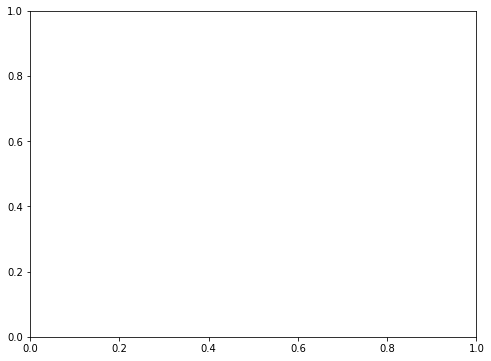

In [71]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# NUMERO DE PARTICULAS TOTAIS
N = Np + Nn

# POSIÇÕES INICIAIS:
x0_list = [float(rand1*np.random.random(rand2)) for x in range(0,N)]
y0_list = [float(rand1*np.random.random(rand2)) for x in range(0,N)]
pn_list = ['positivo' for x in range(0,Np)] + ['negativo' for x in range(0,Nn)]
carga_v_list = [Qp for x in range(0,Np)] + [Qn for x in range(0,Nn)]
Fx_list = [0 for x in range(0,N)]
Fy_list = [0 for x in range(0,N)]

df = pd.DataFrame({'x_i':x0_list, 
                   'y_i':y0_list, 
                   'carga':pn_list, 
                   'carga_valor':carga_v_list,
                   'Fx':Fx_list,
                   'Fy':Fy_list}) 


### ANIMAÇÃO EM TRANSIENTE

In [72]:
anim = animation.FuncAnimation(fig, frame, frames=25, blit=False, repeat=True)

In [73]:
anim

TypeError: ignored